In [2]:
from my_imports import *

In [3]:
import warnings
warnings.filterwarnings('ignore', module='sklearn.metrics.cluster')

In [4]:
df = pd.read_pickle('train_df_sample.pkl')

df = df.reset_index()
df.head()

,customer_ID,P_2_mean,P_2_std,P_2_min,P_2_max,P_2_last,D_39_mean,D_39_std,D_39_min,D_39_max,...,D_64_count,D_64_last,D_64_nunique,D_66_count,D_66_last,D_66_nunique,D_68_count,D_68_last,D_68_nunique,target
0,f9e9fbdc82859e7fdcea35523a78f466aa40d1bb7158da...,0.419922,0.033698,0.390381,0.449951,0.390869,0.336670,0.383050,0.000727,0.680176,...,1,U,1,1,1.0,1,1,5.0,1,1
1,824526e632f8f6c497b71cb13ec0a519be76344d472970...,0.603516,0.033983,0.542480,0.651367,0.613281,0.284424,0.238159,0.004951,0.801758,...,13,U,1,0,NaN,0,13,6.0,1,0
2,b73f63bcbb43055d5bc1b0c4365efa407a939455387a25...,0.823730,NaN,0.823730,0.823730,0.823730,0.000104,NaN,0.000104,0.000104,...,0,NaN,0,0,NaN,0,0,NaN,0,0
3,783d9b5d9f6594d1a5a42d8474d328b72e8f2a5adc0a60...,0.925293,0.070185,0.702637,0.964844,0.957031,0.136353,0.149279,0.000043,0.389404,...,13,O,1,13,1.0,1,13,6.0,1,0
4,2f6a347c73f2fd188d6e110f04275bacb5e0550d7d9d6c...,0.864258,0.017011,0.826172,0.890625,0.826172,0.105286,0.137151,0.004486,0.324707,...,13,R,1,0,NaN,0,13,6.0,1,0


탐색적 데이터 분석과 피처 엔지니어링

In [5]:
import hashlib

def encode_customer_id(id_str):
    encoded_id = hashlib.sha256(id_str.encode('utf-8')).hexdigest()[:16]
    return encoded_id

df['customer_ID'] = df['customer_ID'].apply(encode_customer_id)

def drop_null_cols(df, threshold=0.8):
    # 데이터프레임에서 결측치 비율이 threshold 이상인 변수를 제거하는 함수
    null_percent = df.isnull().mean()
    drop_cols = list(null_percent[null_percent >= threshold].index)
    df = df.drop(drop_cols, axis=1)
    print(f"Dropped {len(drop_cols)} columns: {', '.join(drop_cols)}")
    return df


In [6]:
df = drop_null_cols(df)

Dropped 106 columns: D_49_mean, D_49_std, D_49_min, D_49_max, D_49_last, D_73_mean, D_73_std, D_73_min, D_73_max, D_73_last, D_76_mean, D_76_std, D_76_min, D_76_max, D_76_last, R_9_mean, R_9_std, R_9_min, R_9_max, R_9_last, B_29_mean, B_29_std, B_29_min, B_29_max, B_29_last, D_87_mean, D_87_std, D_87_min, D_87_max, D_87_last, D_88_mean, D_88_std, D_88_min, D_88_max, D_88_last, D_106_mean, D_106_std, D_106_min, D_106_max, D_106_last, R_26_mean, R_26_std, R_26_min, R_26_max, R_26_last, D_108_mean, D_108_std, D_108_min, D_108_max, D_108_last, D_110_mean, D_110_std, D_110_min, D_110_max, D_110_last, D_111_mean, D_111_std, D_111_min, D_111_max, D_111_last, B_39_mean, B_39_std, B_39_min, B_39_max, B_39_last, B_42_mean, B_42_std, B_42_min, B_42_max, B_42_last, D_132_mean, D_132_std, D_132_min, D_132_max, D_132_last, D_134_mean, D_134_std, D_134_min, D_134_max, D_134_last, D_135_mean, D_135_std, D_135_min, D_135_max, D_135_last, D_136_mean, D_136_std, D_136_min, D_136_max, D_136_last, D_137_me

In [7]:
cat_features = [
    "B_30",
    "B_38",
    "D_114",
    "D_116",
    "D_117",
    "D_128",
    "D_126",
    "D_63",
    "D_64",
    "D_68"
]
cat_features = [f"{cf}_last" for cf in cat_features]

In [8]:
import random

num_cols = df.select_dtypes(include=np.number).columns.tolist()
num_cols = [col for col in num_cols if 'target' not in col and col not in cat_features]
num_cols_sample = random.sample([col for col in num_cols if 'target' not in col], 100)

범주형 변수, 수치형 변수 임의 선택

In [9]:
feature_list = num_cols_sample + cat_features
all_list = feature_list + ['target']

df = df[all_list]

def summary(df):
    print(f'data shape: {df.shape}')
    summ = pd.DataFrame(df.dtypes, columns=['data type'])
    summ['#missing'] = df.isnull().sum().values
    summ['%missing'] = df.isnull().sum().values / len(df)* 100
    summ['#unique'] = df.nunique().values
    desc = pd.DataFrame(df.describe(include='all').transpose())
    summ['min'] = desc['min'].values
    summ['max'] = desc['max'].values
    summ['first value'] = df.loc[0].values
    summ['second value'] = df.loc[1].values
    summ['third value'] = df.loc[2].values
    
    return summ


요약 테이블

In [10]:
summary(df)

data shape: (100000, 111)


,data type,#missing,%missing,#unique,min,max,first value,second value,third value
D_46_mean,float16,17405,17.405,3263,-2.603516,4.359375,NaN,0.464355,NaN
D_83_min,float16,1034,1.034,8398,0.0,17.015625,0.00313,0.000594,NaN
D_89_min,float16,224,0.224,8152,0.0,1.005859,0.004433,0.000411,0.002254
D_105_std,float64,49959,49.959,48912,0.0,0.817259,0.001338,NaN,NaN
R_23_last,float16,0,0.000,6926,0.0,1.007812,0.002687,0.009689,0.004444
...,...,...,...,...,...,...,...,...,...
D_126_last,float16,0,0.000,2,0.0,1.0,1.0,1.0,0.0
D_63_last,category,0,0.000,6,NaN,NaN,CO,CL,CO
D_64_last,category,1144,1.144,4,NaN,NaN,U,U,NaN
D_68_last,float16,1151,1.151,7,0.0,6.0,5.0,6.0,NaN


In [11]:
import gc
gc.collect()

0

In [12]:
df[cat_features].head()
df[cat_features].dtypes

B_30_last      float16
B_38_last      float16
D_114_last     float16
D_116_last     float16
D_117_last     float16
D_128_last     float16
D_126_last     float16
D_63_last     category
D_64_last     category
D_68_last      float16
dtype: object

In [13]:
df[cat_features] = df[cat_features].astype(str)

In [14]:
df[cat_features].dtypes

B_30_last     object
B_38_last     object
D_114_last    object
D_116_last    object
D_117_last    object
D_128_last    object
D_126_last    object
D_63_last     object
D_64_last     object
D_68_last     object
dtype: object

In [14]:
"""
for categorical_feature in cat_features:
    if df[categorical_feature].dtype == 'float16':
        df[categorical_feature] = df[categorical_feature].astype(str)
    if df[categorical_feature].dtype == 'category':
        df[categorical_feature] = df[categorical_feature].astype(str)
    elif df[categorical_feature].dtype == 'object':
        df[categorical_feature] = df[categorical_feature].astype(str)
        """

"\nfor categorical_feature in cat_features:\n    if df[categorical_feature].dtype == 'float16':\n        df[categorical_feature] = df[categorical_feature].astype(str)\n    if df[categorical_feature].dtype == 'category':\n        df[categorical_feature] = df[categorical_feature].astype(str)\n    elif df[categorical_feature].dtype == 'object':\n        df[categorical_feature] = df[categorical_feature].astype(str)\n        "

In [15]:
from sklearn.preprocessing import LabelEncoder

le_encoder = LabelEncoder()

for categorical_feature in cat_features:
    df[categorical_feature].fillna(value='NaN', inplace= True)
    df[categorical_feature] = le_encoder.fit_transform(df[categorical_feature])

In [16]:
from sklearn.impute import SimpleImputer

def impute_nan(df, num_cols, strategy='mean'):
    """
     NaN 값을 strategy에 따라 num_cols에 의해 impute하는 함수
    
    :param df: DataFrame
    :param num_cols: list, imputation 대상 numeric column 리스트
    :param strategy: str, imputation 전략 (default: 'mean')
    :return: DataFrame, imputed DataFrame
    :
    """
    imputer = SimpleImputer(strategy=strategy)
    df[num_cols] = imputer.fit_transform(df[num_cols])
    return df

df = impute_nan(df, num_cols_sample, strategy="mean")

df.head()

,D_46_mean,D_83_min,D_89_min,D_105_std,R_23_last,D_91_std,R_18_max,D_61_max,D_102_max,D_102_std,...,B_38_last,D_114_last,D_116_last,D_117_last,D_128_last,D_126_last,D_63_last,D_64_last,D_68_last,target
0,0.476116,0.003130,0.004433,0.001338,0.002687,0.034641,0.009216,0.873047,0.009438,0.002820,...,4,0,0,0,1776,1,1,3,5,1
1,0.464355,0.000594,0.000411,0.067142,0.009689,0.220948,0.009521,1.368164,0.009521,0.003265,...,2,0,0,4,5413,1,0,3,6,0
2,0.476116,0.019196,0.002254,0.067142,0.004444,0.034641,0.006287,0.094238,0.006786,0.063044,...,0,2,2,7,5829,0,1,4,7,0
3,0.484131,0.001447,0.002266,0.067142,0.008232,0.253264,0.008804,0.408447,0.009529,0.002735,...,1,1,0,5,5408,1,1,1,6,0
4,0.447021,0.002539,0.000254,0.067142,0.002062,0.002715,0.009743,0.074402,0.008728,0.003186,...,1,1,0,0,5416,1,0,2,6,0


In [17]:
import plotly.express as px

fig2 = px.pie(df, names='target',
              height = 400, width = 600,
              hole = 0.7,
              title = 'target class Overview',
              color_discrete_sequence=['#4c78a8', '#72b7b2'])
fig2.update_traces(hovertemplate=None, textposition='outside', textinfo='percent+label', rotation = 0)
fig2.update_layout(margin=dict(t=100, b=30, l=0, r=0), showlegend=False,
                   plot_bgcolor='#fafafa', paper_bgcolor='#fafafa',
                   title_font=dict(size=20, color='#555', family="Lato, sans-serif"),
                   font=dict(size=17, color='#8a8d93'),
                   hoverlabel=dict(bgcolor="#444", font_size=13, font_family="Lato, sans-serif"))
fig2.show()

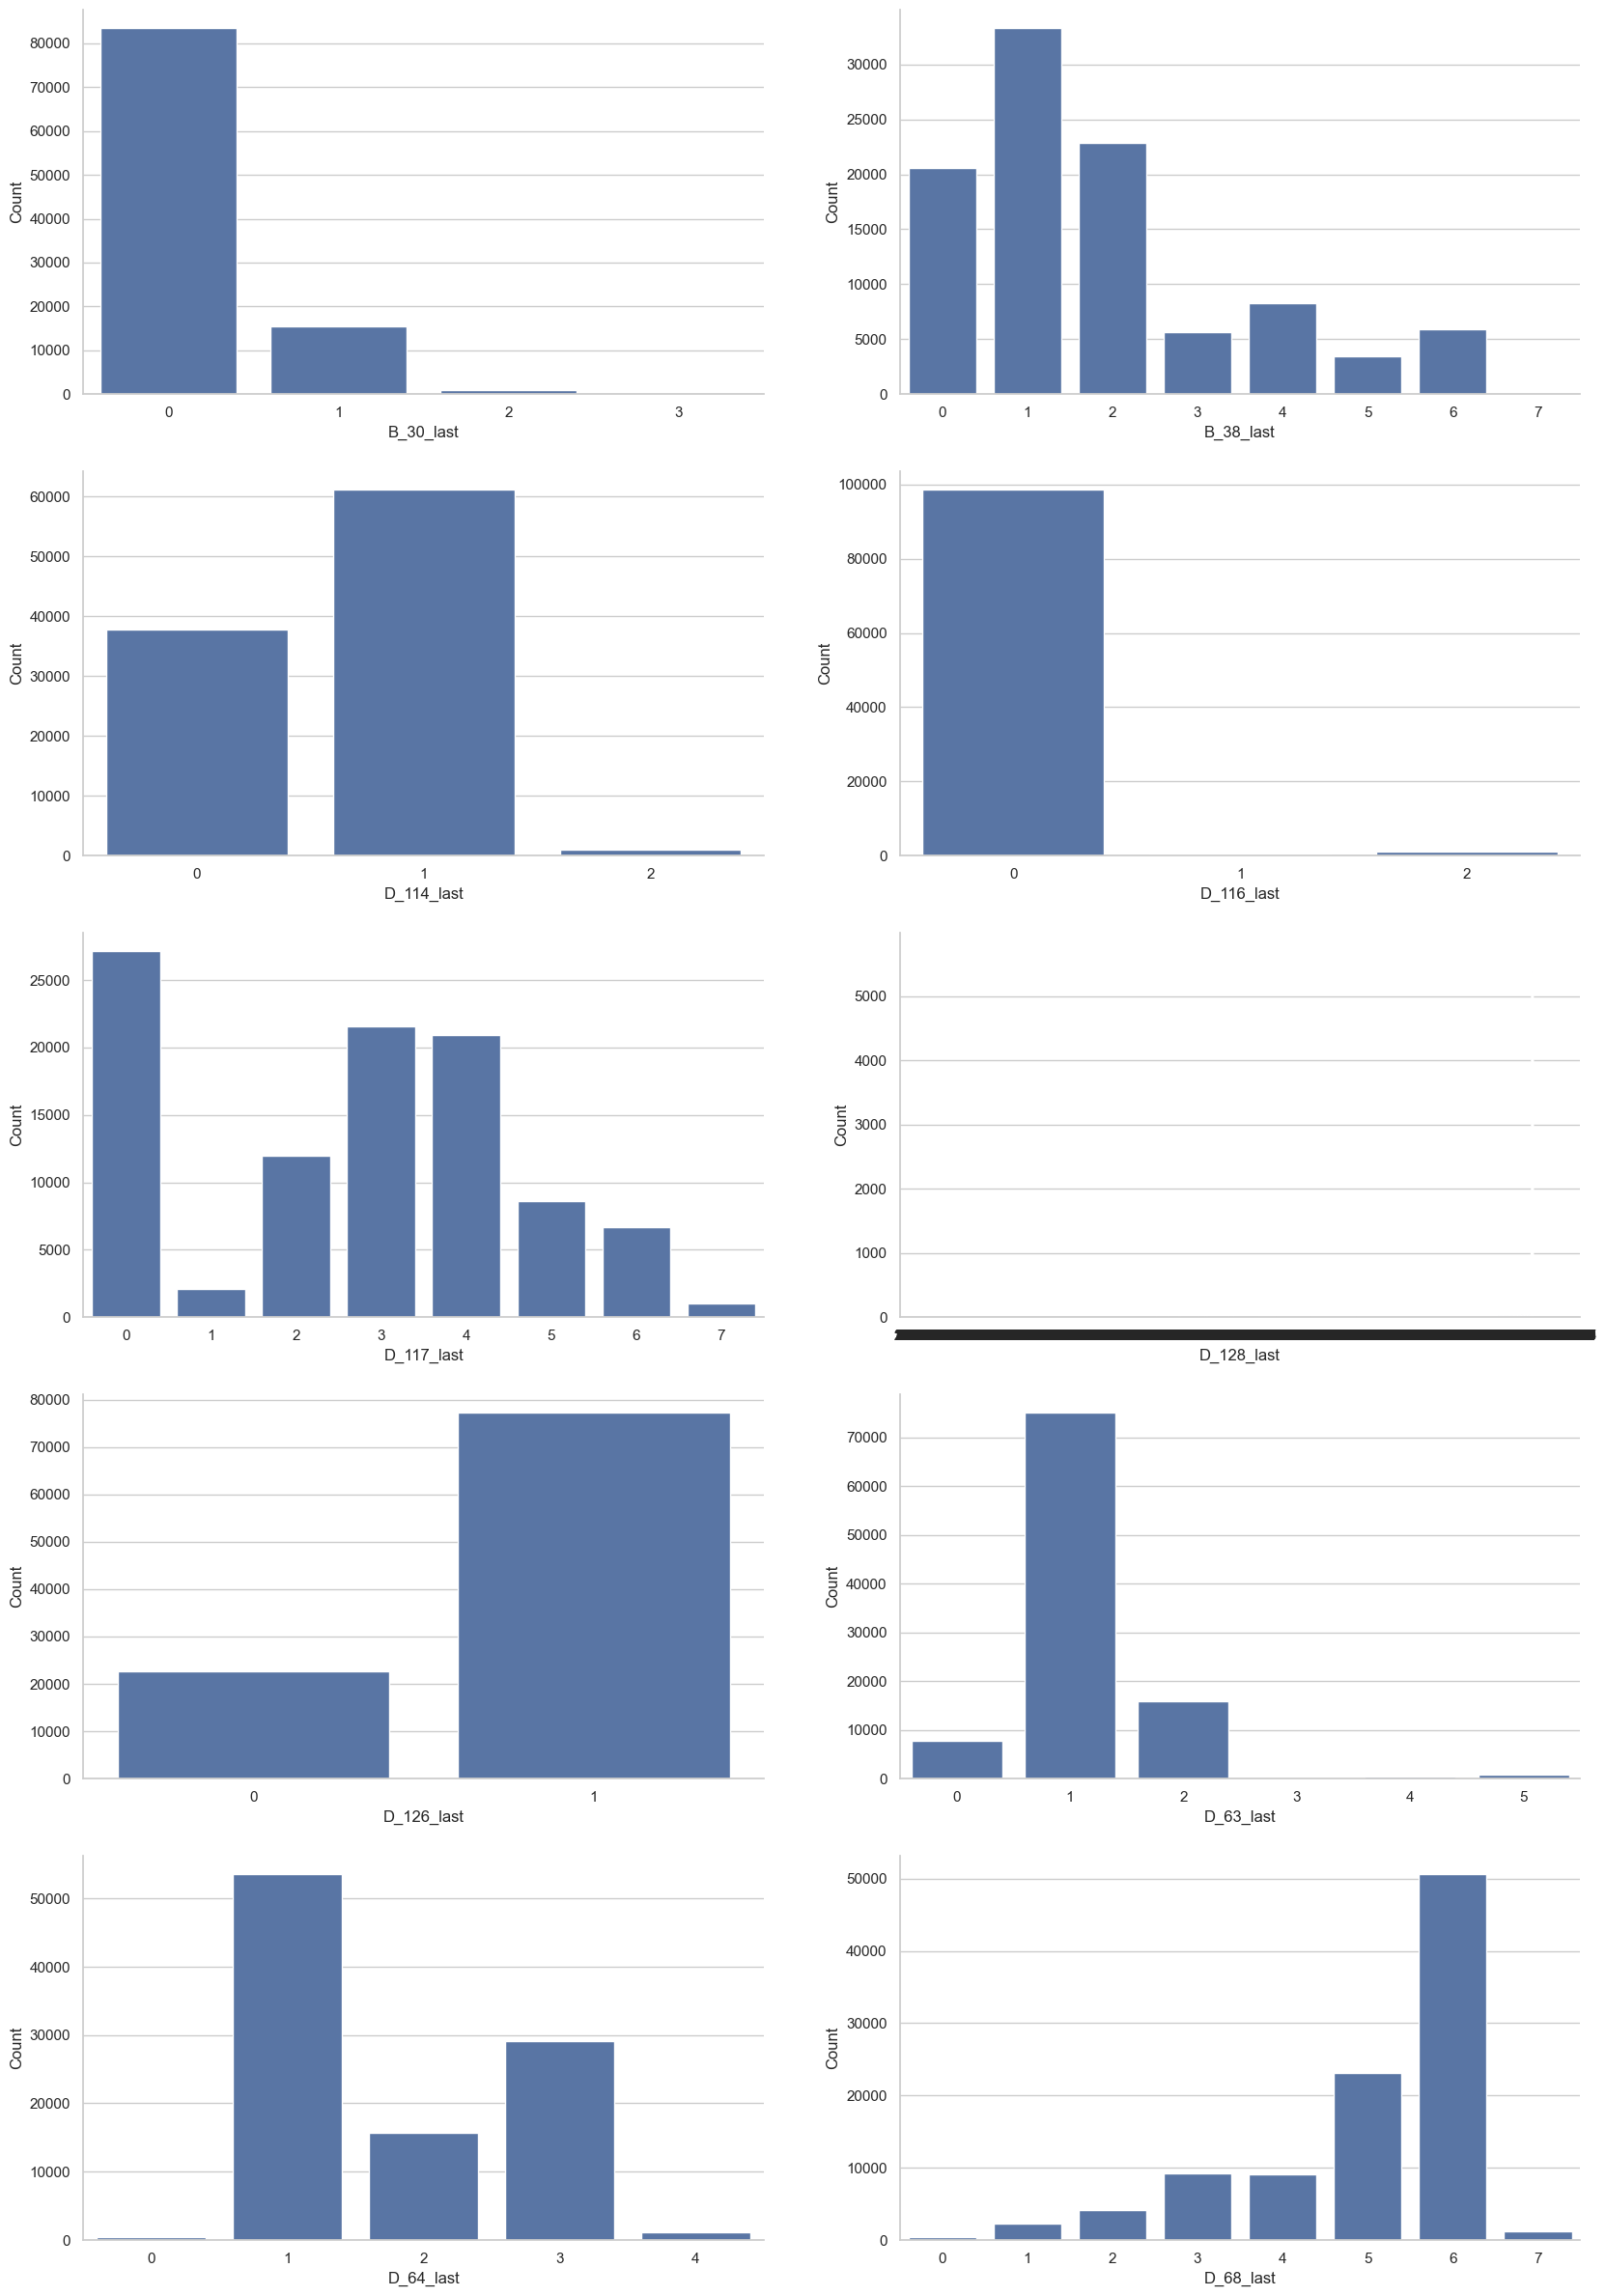

In [18]:
import math
sns.set(style="whitegrid")
fig, axs = plt.subplots(math.ceil(len(cat_features)/2), 2, figsize=(20, 30))
for i, feature in enumerate(cat_features):
    row = i // 2
    col = i % 2
    sns.countplot(x=feature, data=df, ax=axs[row, col])
    axs[row, col].set_xlabel(feature)
    axs[row, col].set_ylabel("Count")
    sns.despine()
plt.show()

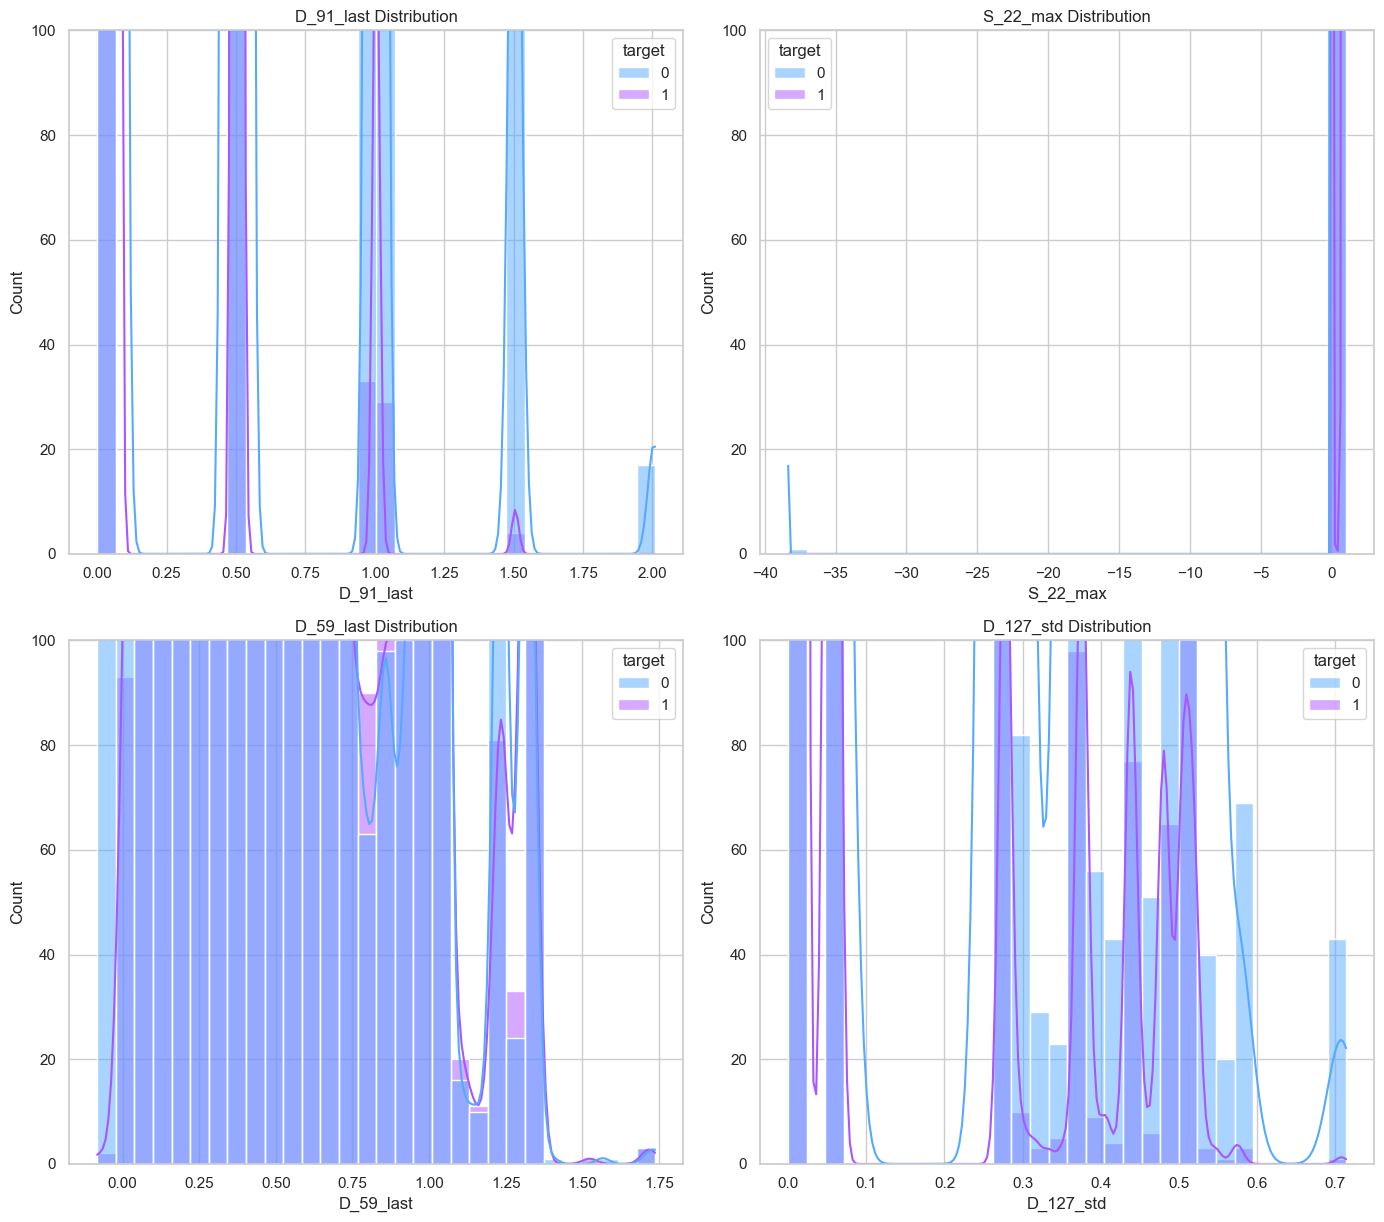

In [19]:
exp_cols = random.sample(num_cols_sample, k=4)

plt.figure(figsize=(14,18))
for idx,column in enumerate(exp_cols):
    plt.subplot(3,2,idx+1)
    sns.histplot(x=column, hue="target", data=df, bins=30, kde=True, palette='cool')
    plt.title(f"{column} Distribution")
    plt.ylim(0,100)
    plt.tight_layout()

WOE와 IV값 계산

In [20]:
def calculate_woe_iv(df, feature_list, cat_features, target):
    result_df = pd.DataFrame(columns=['Feature', 'Bins', 'WOE', 'IV', 'IV_sum'])
    selected_features = [] #피쳐 저장 리스트
    bin_edges_dict = {} #피처별 bin 경곗값 저장 딕셔너리
    woe_dict = {} #피처별 WoE값 저장 딕셔너리
    
    for feature in feature_list:
        if feature in cat_features: # 피쳐가 범주형
            df_temp = df.copy()
            df_temp[feature + '_bins'] = df_temp[feature]
            #범주형 변수의 고윳값들을 bin으로 사용
            bin_edges_dict[feature] = sorted(df[feature].unique())
            #피처의 고유값들을 bin 경곗값으로 저장
        else: #피쳐가 연속형
            df_temp = df.copy()
            df_temp[feature + '_bins'], bin_edges = pd.qcut(df_temp[feature], 10, duplicates='drop', retbins=True)
            bin_edges_dict[feature] = bin_edges
            #피처를 10개의 bin으로 분할, bin 경곗값 저장
        
        #피처의 각 bin에서 이벤트/비이벤트 개수 계산
        grouped_data = df_temp.groupby(feature + '_bins')[target].agg([('non_event', lambda x: sum(1 - x)), ('event', lambda x: sum(x))]).reset_index()
        
        #비이벤트 / 이벤트 비율
        grouped_data['non_event_prop'] = grouped_data['non_event'] / sum(grouped_data['non_event'])
        grouped_data['event_prop'] = grouped_data['event'] / sum(grouped_data['event'])
        
        #WoE 계산
        grouped_data['WOE'] = np.where(
            grouped_data['event_prop'] ==0,
            0,
            np.log(grouped_data['non_event_prop'] / grouped_data['event_prop'])
        )
        
        #IV 계산
        grouped_data['IV'] = (grouped_data['non_event_prop'] - grouped_data['event_prop']) * grouped_data['WOE']
        iv_sum = sum(grouped_data['IV'])
        
        if iv_sum >= 0.02:
            selected_features.append(feature)
            
        result = pd.DataFrame()
        result['Feature'] = [feature] * len(grouped_data)
        result['Bins'] = grouped_data[feature + '_bins']
        result['WOE'] = grouped_data['WOE']
        result['IV'] = grouped_data['IV']
        result['IV_sum'] = [iv_sum] * len(grouped_data)
        
        result_df = pd.concat([result_df, df])
        
        woe_dict[feature] = grouped_data.set_index(feature + '_bins')['WOE'].to_dict()
        
    print("전체 피처 개수:", len(feature_list))
    print("선택된 피처개수:", len(selected_features))
    print("선택된 피처:", selected_features)
    
    return result_df, selected_features, bin_edges_dict, woe_dict


In [23]:
result_df, selected_features, bin_edges_dict, woe_dict = calculate_woe_iv(df, feature_list, cat_features, 'target')
#42분 걸렸음 

전체 피처 개수: 110
선택된 피처개수: 93
선택된 피처: ['D_83_mean', 'D_140_min', 'D_122_min', 'D_105_std', 'R_13_last', 'B_19_mean', 'P_3_max', 'D_127_max', 'B_4_min', 'D_54_mean', 'D_45_min', 'R_8_max', 'R_12_last', 'B_1_mean', 'D_123_mean', 'D_79_mean', 'P_2_last', 'D_102_mean', 'D_124_min', 'S_27_last', 'S_7_mean', 'D_127_mean', 'D_46_mean', 'S_22_max', 'D_52_max', 'B_37_max', 'D_121_mean', 'R_8_min', 'S_5_min', 'R_15_last', 'D_91_mean', 'D_89_max', 'S_5_max', 'B_3_std', 'B_3_mean', 'B_4_mean', 'D_70_std', 'B_18_last', 'D_56_last', 'S_26_std', 'R_20_std', 'D_46_max', 'D_121_last', 'D_92_mean', 'D_112_mean', 'S_25_min', 'D_71_mean', 'D_69_mean', 'S_9_max', 'D_119_mean', 'D_124_max', 'B_23_std', 'P_2_min', 'D_125_last', 'R_14_max', 'D_60_max', 'D_113_std', 'B_8_mean', 'D_70_last', 'D_130_std', 'B_40_std', 'D_70_min', 'S_3_mean', 'D_46_min', 'D_45_mean', 'D_65_max', 'B_12_mean', 'S_25_std', 'B_21_max', 'B_13_max', 'S_16_std', 'B_23_last', 'D_102_max', 'D_141_std', 'D_118_max', 'S_24_mean', 'D_39_mean', '

In [24]:
print(df)

       D_46_mean  D_83_min  D_89_min  D_105_std  R_23_last  D_91_std  \
0       0.476116  0.003130  0.004433   0.001338   0.002687  0.034641   
1       0.464355  0.000594  0.000411   0.067142   0.009689  0.220948   
2       0.476116  0.019196  0.002254   0.067142   0.004444  0.034641   
3       0.484131  0.001447  0.002266   0.067142   0.008232  0.253264   
4       0.447021  0.002539  0.000254   0.067142   0.002062  0.002715   
...          ...       ...       ...        ...        ...       ...   
99995   0.419922  0.000762  0.001882   0.059116   0.004745  0.002999   
99996   0.333008  0.001305  0.000067   0.067142   0.001071  0.220498   
99997   0.419434  0.000020  0.001826   0.189865   0.008194  0.002903   
99998   0.434570  0.001537  0.000325   0.067142   0.002108  0.002665   
99999   0.504883  0.000053  0.000017   0.067142   0.004719  0.138105   

       R_18_max  D_61_max  D_102_max  D_102_std  ...  B_38_last  D_114_last  \
0      0.009216  0.873047   0.009438   0.002820  ...    

WOE 정의 함수

In [23]:
def transform_to_woe(df, selected_features, cat_features, bin_edges_dict, woe_dict, target):
    df_woe =df[selected_features + [target]].copy()
    
    for feature in selected_features:
        if feature in cat_features:
            df_woe[feature] = df_woe[feature].map(woe_dict[feature])
        else:
            feature_bins = pd.cut(df_woe[feature], bins=bin_edges_dict[feature], include_lowest=True)
            df_woe[feature] = feature_bins.map(woe_dict[feature])
    
    return df_woe

In [22]:
df_woe = transform_to_woe(df, selected_features, cat_features, bin_edges_dict, woe_dict, 'target')

df_woe.head()

NameError: name 'selected_features' is not defined

모델링

In [61]:
from sklearn.model_selection import StratifiedKFold
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score

def xgboost_model(df_woe, target, folds=5, seed=2023):
    xgb_models = [] #XGBoost 모델들 저장 리스트
    xgb_oof = [] #out-of-fold 예측 결과 저장 리스트
    predictions = np.zeros(len(df_woe)) # 전체 데이터셋에 대한 예측 결과 저장 배열
    f_imp = [] #특성 중요도 저장 리스트
    
    X = df_woe.drop(columns=[target])
    y = df_woe[target]
    
    skf = StratifiedKFold(n_splits=folds, shuffle=True, random_state=seed)
    for fold, (train_idx, val_idx) in enumerate(skf.split(X, y)):
        print(f'{"#"*24} Training FOLD {fold+1} {"#"*24}')
        
        X_train, y_train = X.iloc[train_idx], y.iloc[train_idx]
        X_valid, y_valid = X.iloc[val_idx], y.iloc[val_idx]
        eval_set = [(X_train, y_train), (X_valid, y_valid)]
        
        model = XGBClassifier(n_estimators=1000, n_jobs=-1, max_depth=4, eta=0.2, colsample_bytree=0.67)
        model.fit(X_train, y_train, eval_set=eval_set, early_stopping_rounds=300, eval_metric="logloss", verbose=0)
        
        val_preds = model.predict_proba(X_valid)[:, 1] # 검증셋에 대한 예측 확률
        val_score = roc_auc_score(y_valid, val_preds) # 검증셋의 ROC AUC
        best_iter = model.best_iteration
        
        idx_pred_target = np.vstack([val_idx, val_preds, y_valid]).T
        #검증셋 인덱스, 에측확률, 실제 타깃값으로 굿어된 배열
        f_imp.append({i: j for i, j in zip(X_train.columns, model.feature_importances_)})
        # 특성 중요도 저장
        
        print(f'{" "*20} auc:{val_score:.5f} {" "*6} best iteration:{best_iter}' )
        
        xgb_oof.append(idx_pred_target) # out-of-fold 예측 결과 추가
        xgb_models.append(model) # 학습된 모델 추가
        
        if val_score> 0.917:
            predictions += model.predict_proba(X)[:, 1]
            # 특정 조건 만족 모델의 예측 확률 누적
        
    predictions /= folds #fold 수로 나누어 평균 예측 확률 계산
    mean_val_auc = np.mean([roc_auc_score(oof[:, 2], oof[:, 1]) for oof in xgb_oof])
    # 평균 out-of-fold ROC AUC 점수
    print('*'*45)
    print(f'Mean AUC: {mean_val_auc:.5f}')
        
    return xgb_models, xgb_oof, predictions, f_imp

In [ ]:
print(df_woe.dtypes)

def convert_category_to_numeric(df):
    for col in df.columns:
        if str(df[col].dtype) == 'category':
            df[col] = df[col].astype('int')
    return df

df_woe = convert_category_to_numeric(df_woe)
print(df_woe.dtypes)

In [1]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module='xgboost')

xgb_models, xgb_oof, predictions, f_imp = xgboost_model(df_woe, 'target', folds=5, seed=2023)


NameError: name 'xgboost_model' is not defined

ROC 곡선과 혼동 행렬 시각화

In [ ]:
from sklearn.metrics import roc_curve, auc, confusion_matrix

plt.figure(figsize=(14,6))

# ROC 커브 시각화
plt.subplot(1, 2, 1)
for oof in xgb_oof:
    fpr, tpr, _ = roc_curve(oof[:, 2], oof[:, 1])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0,1], [0,1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')

plt.subplot(1, 2, 2)
# 혼동 행렬 계산, plot
# 확률 대신 예측 클래스 사용
# 예측 임곗값으로 0.5 사용
predictions_class = [1 if pred > 0.5 else 0 for pred in predictions]
cm = confusion_matrix(df_woe['target'], predictions_class)
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')

plt.tight_layout()
plt.show()

점수로 변환

In [ ]:
base_score = 650
PDO = 20

# factor , offset 계산. factor는 신용점수 계산에서 확률변화가 점수에 미치는 영향의 강도
# offset 은 신용 점수 계산의 기준점 또는 시작점

factor = PDO / np.log(2)
offset = base_score - (factor * np.log(20))

# 스코어 계산을 위한 함수 정의
def calculate_score(probability, factor, offset):
    odds = (probability / (1 - probability))
    score = offset  + (factor * np.log(odds))
    return np.clip(score, 250, 1000)

# 스코어 계산
scores = calculate_score(1 - predictions, factor, offset)

# 스코어를 반올림
scores = np.round(scores)

#점수 시각화
plt.hist(scores, bins=20)
plt.title('Credit Score Distribution')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.show()

In [ ]:
# 예측 확률과 스코어를 데이터프레임에 열로 추가
df_woe['probability'] = predictions
df_woe['credit_score'] = scores

# 5개 행을 랜덤으로 선택
samples = df_woe.sample(5, random_state=42)

samples

인퍼런스 데이터 테스트

In [ ]:
def predict_and_score(model, instance, factor, offset):
    # 데이터를 원하는 형태로 변환
    if len(instance.shape) == 1:
        instance = instance.values.reshape(1,-1)
        
    # 예측
    probability = model.predict_proba(instance)[:, 1]
    
    # 스코어 산출
    score = calculate_score(1-probability, factor, offset)
    score = np.round(score)
    
    return score[0]

inference = df_woe.drop(['target', 'probability', 'credit_score'], axis=1)

inference.sample(1)

#샘플 데이터 추출
sample = inference.sample(1)

# 결과 반환
score = predict_and_score(xgb_models[0], sample, factor, offset)
print("해당 고객의 신용 점수는 다음과 같습니다:", score)